In [51]:
words = open("Files/names.txt", "r").read().splitlines()  # I have renamed baby_names_final2.txt as names.txt

In [52]:
words.remove('Y')

words.remove([w for w in words if len(w)==40][0])

words.remove([w for w in words if len(w)==30][0])

words.remove([w for w in words if len(w)==27][0])

words.remove([w for w in words if len(w)==24][0])

words.remove([w for w in words if len(w)==24][0])

words.remove([w for w in words if len(w)==23][0])

if "Subrahmanya" not in words:
    words.append("Bhavana")
if "Subramani" not in words:
    words.append("Bhavna")

if "Jyotirmayi" not in words:
    words.append("Bhavana")
if "Jyothirmaayee" not in words:
    words.append("Bhavna")

if "Jagrati" not in words:
    words.append("Bhavana")
if "jagruti" not in words:
    words.append("Bhavna")

if "Bhavana" not in words:
    words.append("Bhavana")
if "Bhavna" not in words:
    words.append("Bhavna")

In [53]:
import re

def process_names(names_list):
    processed_names = []
    invalid_chars = {"'", '(', ')', '.', 'Á', 'È', 'É', 'Ë', 'Ó', 'à', 'á', 'â', 'ã', 'ç', 'è', 'é', 'ê', 'ë', 'ì', 'í', 'î', 'ï', 'ñ', 'ó', 'ô', 'ö', 'ù', 'ú', '’', '\ue01f'}

    for names in names_list:
        # Convert to lowercase
        names = names.lower()
        
        # Split the string based on spaces, commas, slashes, and hyphens
        split_names = re.split(r'[\s,\/\-]+', names)
        
        # Remove any brackets and the text within them
        clean_names = [re.sub(r'\(.*?\)', '', name).strip() for name in split_names if name.strip()]

        # Filter out names containing invalid characters
        clean_names = [name for name in clean_names if not any(char in name for char in invalid_chars)]

        # Add the cleaned names to the processed_names list
        processed_names.extend(clean_names)

    return processed_names

In [54]:
words = process_names(words)

In [55]:
words = [w for w in words if w]

words = [w for w in words if len(w)!=1]

In [56]:
len(words)

30679

In [57]:
words[:10]

['aelie',
 'darrellee',
 'barbra',
 'robsan',
 'leovanni',
 'haniyah',
 'jhazzryn',
 'tannistha',
 'sujata',
 'jairuz']

In [58]:
min(len(w) for w in words)

2

In [59]:
max(len(w) for w in words)

19

In [60]:
[w for w in words if len(w)==19]

['venkataramananandan']

In [61]:
with open("Files/processed_names.txt", "w") as file:
    for name in words:
        file.write(name + "\n")

## We can read processed file directly

In [1]:
words = open("Files/processed_names.txt", "r").read().splitlines()

In [2]:
len(words)

30679

In [3]:
min(len(w) for w in words)

2

In [4]:
max(len(w) for w in words)

19

In [5]:
words[0:3]

['aelie', 'darrellee', 'barbra']

## Bigram Character level language Model
- ### The intuitive approach using counts
- ### Neural Network approach

### Intuitive approach

In [6]:
b = {}
for w in words:
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [7]:
sorted(b.items(), key=lambda kv: -kv[1])

[(('a', '<E>'), 9596),
 (('a', 'n'), 6137),
 (('<S>', 'a'), 4060),
 (('n', '<E>'), 3996),
 (('h', 'a'), 3772),
 (('r', 'a'), 3712),
 (('n', 'a'), 3618),
 (('<S>', 's'), 3606),
 (('a', 'r'), 3576),
 (('i', '<E>'), 3505),
 (('s', 'h'), 3376),
 (('e', '<E>'), 3030),
 (('m', 'a'), 3020),
 (('r', 'i'), 2731),
 (('a', 'l'), 2673),
 (('<S>', 'm'), 2543),
 (('l', 'a'), 2448),
 (('y', 'a'), 2306),
 (('i', 'n'), 2180),
 (('k', 'a'), 2111),
 (('h', '<E>'), 2071),
 (('e', 'n'), 2053),
 (('<S>', 'k'), 2046),
 (('e', 'l'), 2020),
 (('l', 'e'), 1965),
 (('l', 'i'), 1952),
 (('n', 'i'), 1875),
 (('t', 'a'), 1837),
 (('s', 'a'), 1783),
 (('<S>', 'r'), 1758),
 (('a', 'm'), 1751),
 (('a', 'y'), 1727),
 (('e', 'e'), 1712),
 (('h', 'i'), 1631),
 (('i', 'a'), 1508),
 (('a', 'h'), 1506),
 (('<S>', 'j'), 1498),
 (('a', 's'), 1498),
 (('n', 'n'), 1479),
 (('a', 't'), 1464),
 (('i', 's'), 1426),
 (('v', 'a'), 1402),
 (('<S>', 'l'), 1370),
 (('<S>', 't'), 1369),
 (('r', 'e'), 1364),
 (('n', 'e'), 1354),
 (('a', 

In [8]:
import torch

In [19]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [22]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi["."] = 0
itos = {i:s for s, i in stoi.items()}

In [25]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

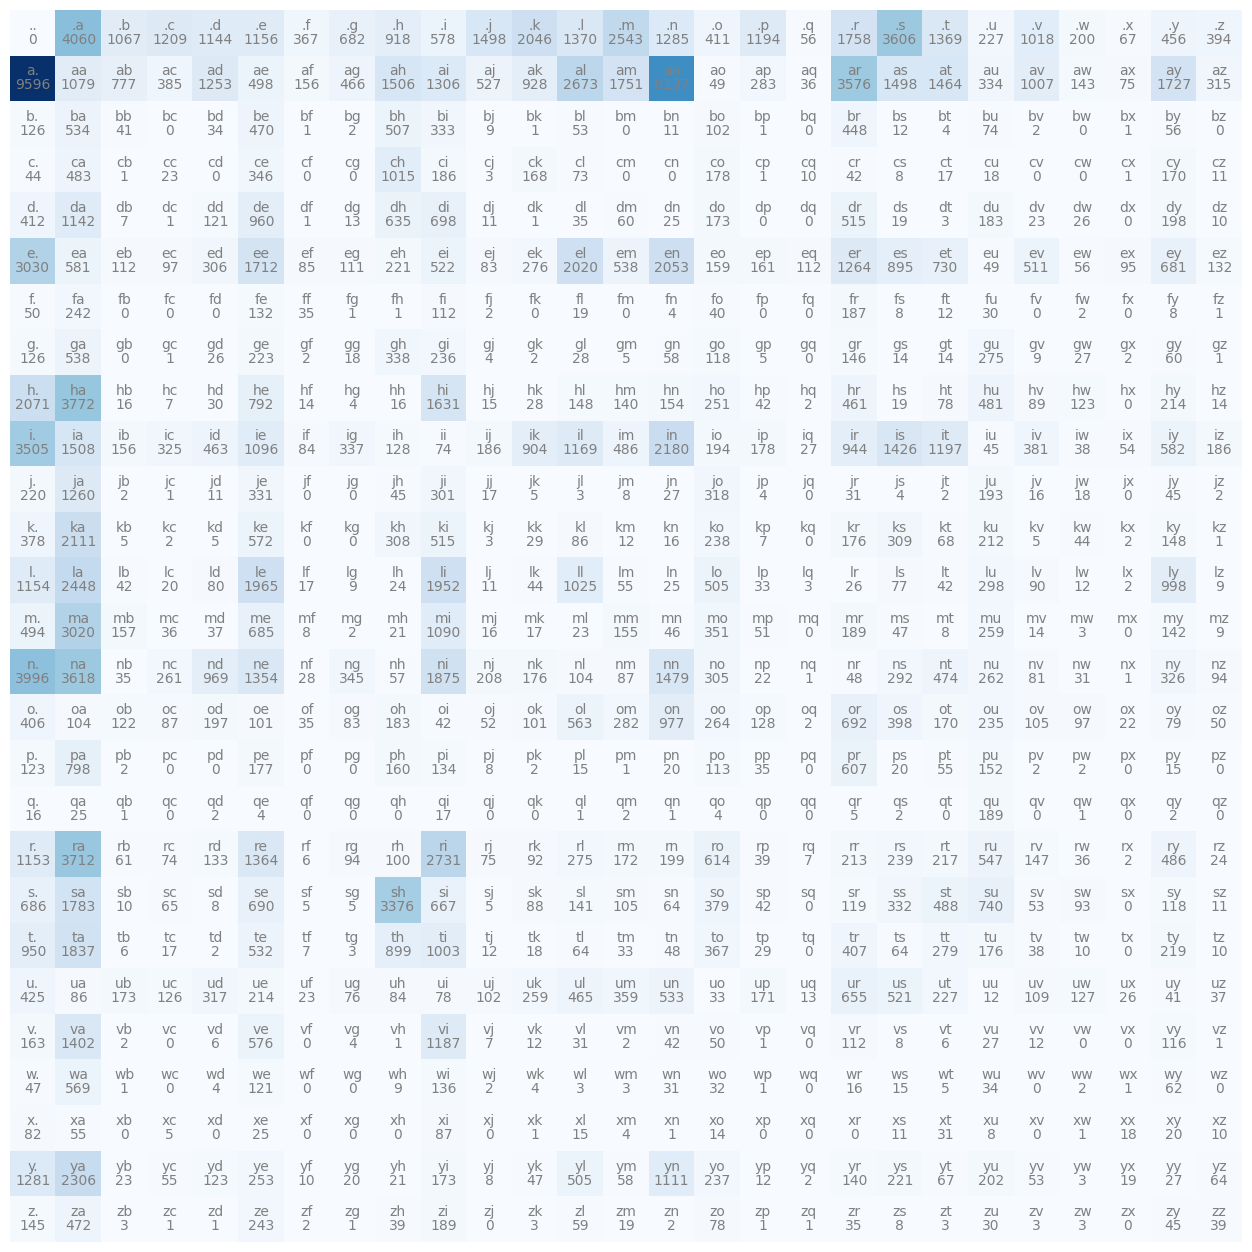

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap="Blues")
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis("off");

## Converting counts to probabilities
- ### Sampling using torch.multinomial to sample based on the given probability distribution

In [32]:
p = N[0].float()
p = p/p.sum()
p

tensor([0.0000, 0.1323, 0.0348, 0.0394, 0.0373, 0.0377, 0.0120, 0.0222, 0.0299,
        0.0188, 0.0488, 0.0667, 0.0447, 0.0829, 0.0419, 0.0134, 0.0389, 0.0018,
        0.0573, 0.1175, 0.0446, 0.0074, 0.0332, 0.0065, 0.0022, 0.0149, 0.0128])

In [40]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

### Creating probability distribution for each row

In [87]:
P = (N+1).float()  # model smoothing by adding 1
P /= P.sum(1, keepdim=True)

In [88]:
seedNo = 2147483647
g = torch.Generator().manual_seed(seedNo)
for i in range(20):
    ix = 0
    res = ""
    while True:
        # p = N[ix].float()
        # p = p/p.sum()
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        if ix==0:
            break
        res += itos[ix]
    print(res)

junide
janakah
p
cyay
a
nna
shinitolia
satha
vilanaauranileviasshbdainrwi
ta
shiyanaylarte
favaumesafontume
ponnsuwahasani
cora
yaenonara
jabhinerimikimaynin
anaasn
svilususushadi
ssmatan
il


## Evaluating how good this model is

In [89]:
log_likelihood = 0.0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logProb = torch.log(prob)
        log_likelihood += logProb
        # print(f'{ch1}{ch2}: {prob=} {logProb=}')
        n += 1
print(f"{log_likelihood=}")
nll = -log_likelihood
print(f"{nll=}")
print(nll/n)

log_likelihood=tensor(-566309.4375)
nll=tensor(566309.4375)
tensor(2.4725)


### Neural Network approach for bigram model

In [90]:
# create the training set of all the bigrams (x, y) - given the first character predict the next character
xs , ys = [], []
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. a
a e
e l
l i
i e
e .


In [93]:
# here xs and ys are integers
# we need to do one hot encoding for integers to feed into neural network

In [100]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [101]:
xenc.shape

torch.Size([6, 27])

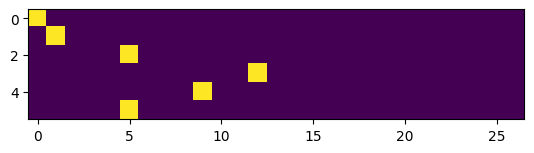

In [102]:
plt.imshow(xenc)

In [121]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)
xenc @ W  # Matrix multiplication

tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02, -1.1008e+00,  2.8588e-01,
         -2.9643e-02, -1.5471e+00,  6.0489e-01,  7.9136e-02,  9.0462e-01,
         -4.7125e-01,  7.8682e-01, -3.2843e-01, -4.3297e-01,  1.3729e+00,
          2.9334e+00,  1.5618e+00, -1.6261e+00,  6.7716e-01, -8.4039e-01,
          9.8488e-01, -1.4837e-01, -1.4795e+00,  4.4830e-01, -7.0730e-02,
          2.4968e+00,  2.4448e+00],
        [-6.7006e-01, -1.2199e+00,  3.0314e-01, -1.0725e+00,  7.2762e-01,
          5.1114e-02,  1.3095e+00, -8.0220e-01, -8.5042e-01, -1.8068e+00,
          1.2523e+00, -1.2256e+00,  1.2165e+00, -9.6478e-01, -2.3211e-01,
         -3.4762e-01,  3.3244e-01, -1.3263e+00,  1.1224e+00,  5.9641e-01,
          4.5846e-01,  5.4011e-02, -1.7400e+00,  1.1560e-01,  8.0319e-01,
          5.4108e-01, -1.1646e+00],
        [ 4.7236e-01,  1.4830e+00,  3.1748e-01,  1.0588e+00,  2.3982e+00,
          4.6827e-01, -6.5650e-01,  6.1662e-01, -6.2197e-01,  5.1007e-01,
          1.3563e+00,  2.3445e-01, -4.55

In [123]:
logits = xenc @ W  # log counts
counts = logits.exp()  # kind of equivalent to the N matrix we formed intuitively
probs = counts / counts.sum(1, keepdim=True)
# counts and probs operation are collectively formed with the softmax activation function
probs

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0150, 0.0086, 0.0396, 0.0100, 0.0606, 0.0308, 0.1084, 0.0131, 0.0125,
         0.0048, 0.1024, 0.0086, 0.0988, 0.0112, 0.0232, 0.0207, 0.0408, 0.0078,
         0.0899, 0.0531, 0.0463, 0.0309, 0.0051, 0.0329, 0.0654, 0.0503, 0.0091],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0107, 0.0173, 0.0445, 0.0068, 0.0278, 0.0232, 0.0120, 0.0329, 0.0381,
         0.0135, 0.0051, 0.0085, 0.0365, 0.0234, 0.0411, 0.0290, 0.1845, 0.0757,
         0.0110, 0.0143, 0.0261, 0.1264, 0.0338, 0.0737, 0.0293, 0.0383, 0.0167],
        [0.0227, 0.1059,

In [125]:
torch.tensor([probs[0, ys[0]], probs[1, ys[1]], probs[2, ys[2]], probs[3, ys[3]], probs[4, ys[4]], probs[5, ys[5]]]).log().mean()

tensor(-4.1040)

In [126]:
loss = -probs[torch.arange(6), ys].log().mean()
loss

tensor(4.1040, grad_fn=<NegBackward0>)

In [127]:
# backward pass
W.grad = None  # set to 0
loss.backward()

In [128]:
W.grad

tensor([[ 0.0101, -0.1650,  0.0021,  0.0007,  0.0028,  0.0020,  0.0004,  0.0039,
          0.0023,  0.0052,  0.0013,  0.0046,  0.0015,  0.0014,  0.0083,  0.0396,
          0.0101,  0.0004,  0.0042,  0.0009,  0.0056,  0.0018,  0.0005,  0.0033,
          0.0020,  0.0256,  0.0243],
        [ 0.0025,  0.0014,  0.0066,  0.0017,  0.0101, -0.1615,  0.0181,  0.0022,
          0.0021,  0.0008,  0.0171,  0.0014,  0.0165,  0.0019,  0.0039,  0.0034,
          0.0068,  0.0013,  0.0150,  0.0089,  0.0077,  0.0051,  0.0009,  0.0055,
          0.0109,  0.0084,  0.0015],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [129]:
# update the params, here its just W
W.data += -0.1*W.grad

In [130]:
logits = xenc @ W  # log counts
counts = logits.exp()  # kind of equivalent to the N matrix we formed intuitively
probs = counts / counts.sum(1, keepdim=True)
# counts and probs operation are collectively formed with the softmax activation function
loss = -probs[torch.arange(6), ys].log().mean()
loss

tensor(4.0864, grad_fn=<NegBackward0>)

In [131]:
# we can see that the loss decreased

## Summarizing altogether

In [149]:
# create the training set of all the bigrams (x, y) - given the first character predict the next character
xs , ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print("Number of examples: ", num)
# initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

Number of examples:  229043


In [154]:
# gradient descent
for k in range(100):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W  # log counts
    counts = logits.exp()  # kind of equivalent to the N matrix we formed intuitively
    probs = counts / counts.sum(1, keepdim=True)
    
    # calculating the loss function
    loss = -probs[torch.arange(num), ys].log().mean()
    print(f"Iteration {k+1}:  loss= {loss.item()}")
    
    # backward pass
    W.grad = None  # set to 0
    loss.backward()
    
    # update the params, here its just W
    W.data += -50*W.grad
    

Iteration 1:  loss= 2.4767801761627197
Iteration 2:  loss= 2.4767634868621826
Iteration 3:  loss= 2.476746082305908
Iteration 4:  loss= 2.476729154586792
Iteration 5:  loss= 2.476712226867676
Iteration 6:  loss= 2.4766955375671387
Iteration 7:  loss= 2.4766788482666016
Iteration 8:  loss= 2.4766621589660645
Iteration 9:  loss= 2.4766457080841064
Iteration 10:  loss= 2.4766294956207275
Iteration 11:  loss= 2.4766132831573486
Iteration 12:  loss= 2.4765970706939697
Iteration 13:  loss= 2.47658109664917
Iteration 14:  loss= 2.476565361022949
Iteration 15:  loss= 2.4765493869781494
Iteration 16:  loss= 2.476533889770508
Iteration 17:  loss= 2.476518154144287
Iteration 18:  loss= 2.4765024185180664
Iteration 19:  loss= 2.476487159729004
Iteration 20:  loss= 2.4764716625213623
Iteration 21:  loss= 2.476456880569458
Iteration 22:  loss= 2.4764416217803955
Iteration 23:  loss= 2.476426601409912
Iteration 24:  loss= 2.476411819458008
Iteration 25:  loss= 2.4763967990875244
Iteration 26:  loss= 

### Sampling from neural network

In [160]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W  # log counts
        counts = logits.exp()  # kind of equivalent to the N matrix we formed intuitively
        p = counts / counts.sum(1, keepdim=True)  # probability for next character

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix==0:
            break
    print(''.join(out))

junide.
janakah.
p.
cfay.
a.
nna.
shinitolia.
satha.
vilanaauranileviasshbdainrwi.
ta.
shiyanaylarte.
favaumesafontume.
ponnsuwahasani.
cora.
yaenonara.
jabhinerimikimaynin.
anaasn.
svilususushadi.
ssmatan.
il.


In [161]:
## The above result is exactly the same as what we got using our intuition method

# Better Approaches